# Counting shortest paths on a grid graph

We will make a short survey of different algorithms to count shortest paths on a grid graph. We will denote $C_{m,n} = C(m,n)$ for $m,n \in \mathbb{Z}_{\geqslant 0}$ to be the number of paths from $(0,0)$ to $(m,n)$ along ```UP```$=(1,0)$ or ```RIGHT```$=(0,1)$ directions.

The easiest way is to use a recursion relation:

***A path ending $(m,n)$ must reach either $(m-1,n)$ or $(m,n-1)$.***

and count all the $C_{m',n'}$ for $0\leqslant m' \leqslant m$ and $1\leqslant n' \leqslant n$. The algorithm is shown as follows.

Button(description='Random grid', style=ButtonStyle())

Output()

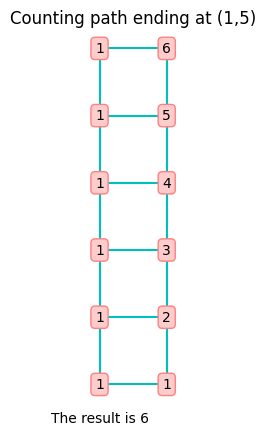

In [3]:
import ipywidgets as widgets
import numpy as np
from IPython.display import display,clear_output
from matplotlib import pyplot as plt
from matplotlib import animation
import random
import time

button = widgets.Button(description="Random grid")
output_widget = widgets.Output()

display(button)

def recursivePathCount(change):
    xLen = random.randint(0,8)
    yLen = random.randint(0,8)
    fig, ax = plt.subplots()
    ax.set_title(f'Counting path ending at ({xLen},{yLen})')
    for _ in range(xLen+1):
        ax.plot(np.array([_]*(yLen+1)),np.arange(0,yLen+1,step=1),'c',marker='o')
    for _ in range(yLen+1):
        ax.plot(np.array([0,xLen]),np.array([_,_]),'c')
    ax.set_aspect('equal')
    plt.axis('off')
    plt.grid(False)
    
    with output_widget:
        output_widget.clear_output()
        clear_output(wait=True)
        display(fig)
        time.sleep(0.2)
        c = {(0,0):1}
        plt.text(0,0,c[(0,0)],ha='center',verticalalignment='center',bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
        clear_output(wait=True)
        display(fig)
        time.sleep(0.2)
        for i in range(yLen):
            c[(0,i+1)] = 1
            line,= ax.plot(np.array([0,0]),np.array([i,i+1]),'b')
            clear_output(wait=True)
            display(fig)
            time.sleep(0.2)
            line.remove()
            plt.text(0,i+1,c[(0,i+1)],ha='center',verticalalignment='center',bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
            )
            clear_output(wait=True)
            display(fig)
            time.sleep(0.2)
            
        for j in range(1,xLen + 1):
            c[(j,0)] = 1
            line,= ax.plot(np.array([j-1,j]),np.array([0,0]),'b')
            clear_output(wait=True)
            display(fig)
            time.sleep(0.2)
            line.remove()
            plt.text(j,0,c[(j,0)],ha='center',verticalalignment='center',bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
            )
            clear_output(wait=True)
            display(fig)
            time.sleep(0.2)
            for i in range(1,yLen+1):
                c[(j,i)] = c[(j-1,i)] + c[(j,i-1)]
                line1,= ax.plot(np.array([j,j]),np.array([i-1,i]),'b')
                line2,= ax.plot(np.array([j-1,j]),np.array([i,i]),'b')
                clear_output(wait=True)
                display(fig)
                time.sleep(0.2)
                line1.remove()
                line2.remove()
                plt.text(j,i,c[(j,i)],ha='center',verticalalignment='center',bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
            )
                clear_output(wait=True)
                display(fig)
                time.sleep(0.2)
        plt.text(xLen // 2,-0.5,f'The result is {c[(xLen,yLen)]}',ha='center',verticalalignment='center')
        clear_output(wait=True)
        display(fig)
        time.sleep(0.2)
        
button.on_click(recursivePathCount)
display(output_widget)